# US Accidents EDA  
---

This project focuses on exploring and analyzing the US Accidents dataset, which contains data on traffic incidents across the United States. The goal is to extract meaningful insights, identify patterns, and understand the factors that contribute to accidents across different states and times.

- The dataset is sourced from Kaggle, providing comprehensive records of traffic accidents across the United States.

- Insights derived from this analysis can contribute to strategies aimed at reducing and preventing accidents, enhancing road safety.

In [1]:
import warnings
#ignores 'Runtime Warning'!
warnings.filterwarnings("ignore", category=RuntimeWarning) 
#Ignores 'FutureWarning'!
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na option is deprecated.*")

## Load the Data
---

In [ ]:
data_url = "https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"
data_filename = "/kaggle/input/us-accidents/US_Accidents_March23.csv"



In [4]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation & cleaning
---
- Load the data using Pandas
- Look at some information about the data and the columns
- Fix any incorrect or missing values

In [5]:
df = pd.read_csv(data_filename)

In [6]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [10]:
missing_percentage = df.isnull().sum().sort_values(ascending = False) / len(df) * 100
print('\033[32mMissing Value Percentage\033[0m')
missing_percentage

Missing Value Percentage


End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [11]:
type(missing_percentage)

pandas.core.series.Series

In [12]:
missing_percentage[missing_percentage > 0]

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64

In [13]:
df.drop(['End_Lat','End_Lng', 'ID'], axis = 1, inplace = True)

In [14]:
#Calculating no. of Numeric Columns 
numeric_df = df.select_dtypes(include = ['int', 'float'])
f'No. of Numeric Columns = {len(numeric_df.columns)}'

'No. of Numeric Columns = 11'

## Exploratory analysis & visualization
---
Columns under Considration:

1. City
2. Start Time
3. Start Lat, Start Lang.
4. Temparature 
5. Weather Condition

### 1. Exploring Cities
---

In [15]:
cities = df.City.unique()
len(cities)

13679

In [16]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [17]:
cities_by_accident.loc['New York']

np.int64(21699)

<Axes: ylabel='City'>

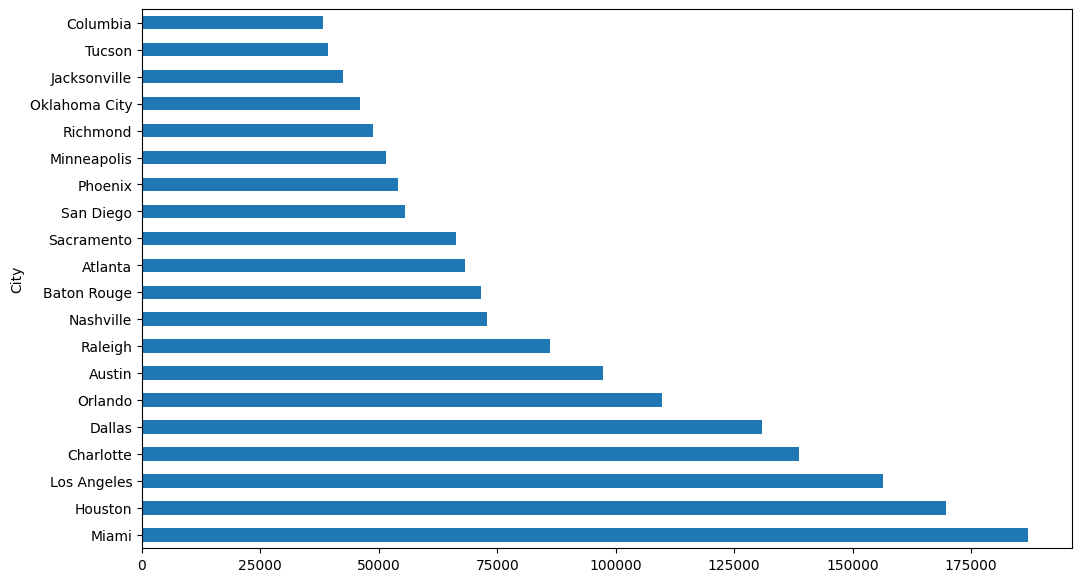

In [18]:
cities_by_accident[:20].plot(kind='barh', figsize=(12, 7))

Text(-16.805555555555557, 0.5, 'Density')

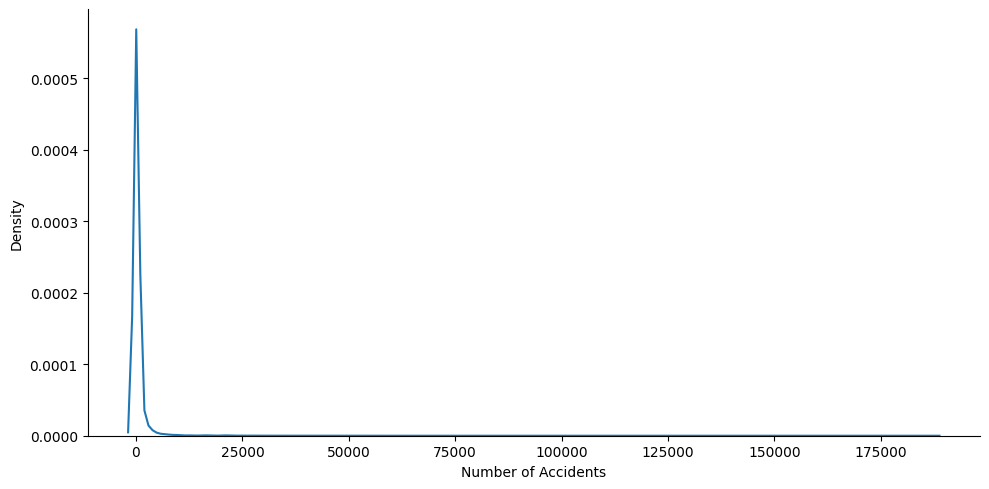

In [19]:
# NOTE: aspect attribute widens the plot
sns.displot(cities_by_accident, kind='kde', aspect = 2)
plt.xlabel('Number of Accidents')
plt.ylabel('Density')

In [20]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [21]:
print(f'Out of {len(cities_by_accident)} cities \033[93m {len(high_accident_cities)} \033[0m have more than 1000 yearly accidents')

Out of 13678 cities  1218  have more than 1000 yearly accidents


In [22]:
print(f'Out of {len(cities_by_accident)} cities \033[93m {len(low_accident_cities)} \033[0m have less than 1000 yearly accidents')

Out of 13678 cities  12460  have less than 1000 yearly accidents


In [23]:
#percentage of cities which have more then 1000 acccidents
high = len(high_accident_cities)/len(cities_by_accident) *100
f'{high:.2f}%'

'8.90%'

In [24]:
#percentage of cities which have less then 1000 acccidents
less = len(low_accident_cities)/len(cities_by_accident) *100
f'{less:.2f}%'

'91.10%'

Text(0.5, 1.0, 'Distribution of High accident cities')

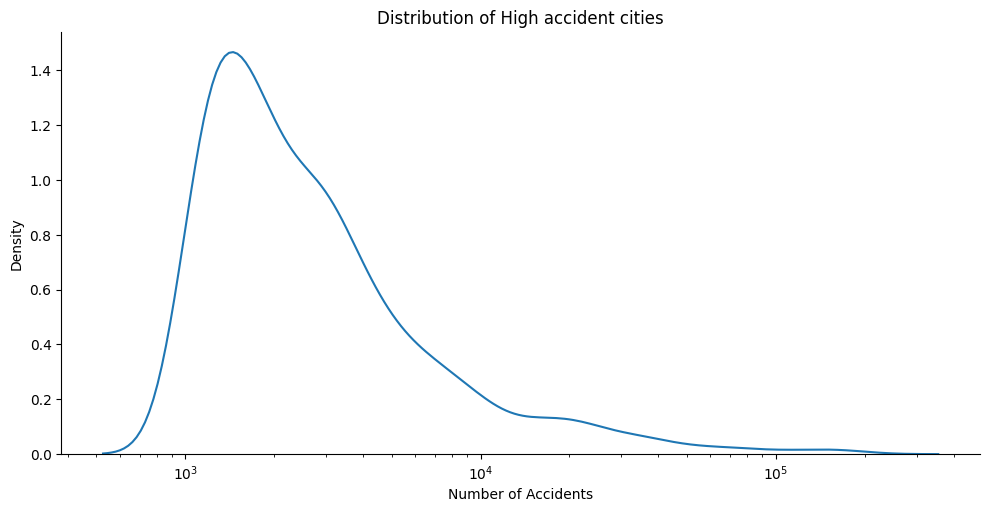

In [25]:
# NOTE: aspect attribute widens the plot
sns.displot(high_accident_cities, kind='kde', log_scale=True, aspect = 2)
plt.xlabel('Number of Accidents')
plt.ylabel('Density')
plt.title('Distribution of High accident cities')

- Plot concludes the presence of fewer  cities with 1,00,000 accident

Text(0.5, 1.0, 'Distribution of low accident cities')

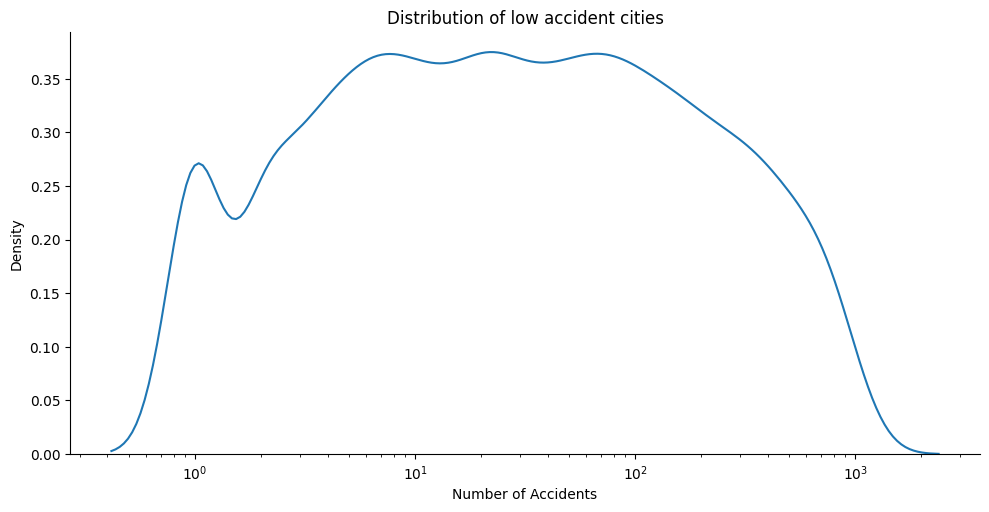

In [26]:
# NOTE: aspect attribute widens the plot
sns.displot(low_accident_cities, kind='kde', log_scale=True, aspect = 2)
plt.xlabel('Number of Accidents')
plt.ylabel('Density')
plt.title('Distribution of low accident cities')

- Plot concludes the presence of more no. of cities with just one accident

In [27]:
one_accident = len(cities_by_accident[cities_by_accident == 1])
print(f'No. of cities with just one accident \033[32m "{one_accident}" \033[0m')

No. of cities with just one accident  "1023" 


### 2. Exploring Start Time
___

In [28]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [29]:
type(df.Start_Time)

pandas.core.series.Series

In [30]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y-%m-%d %H:%M:%S.%f")

In [31]:
df['Start_Time']

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [32]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

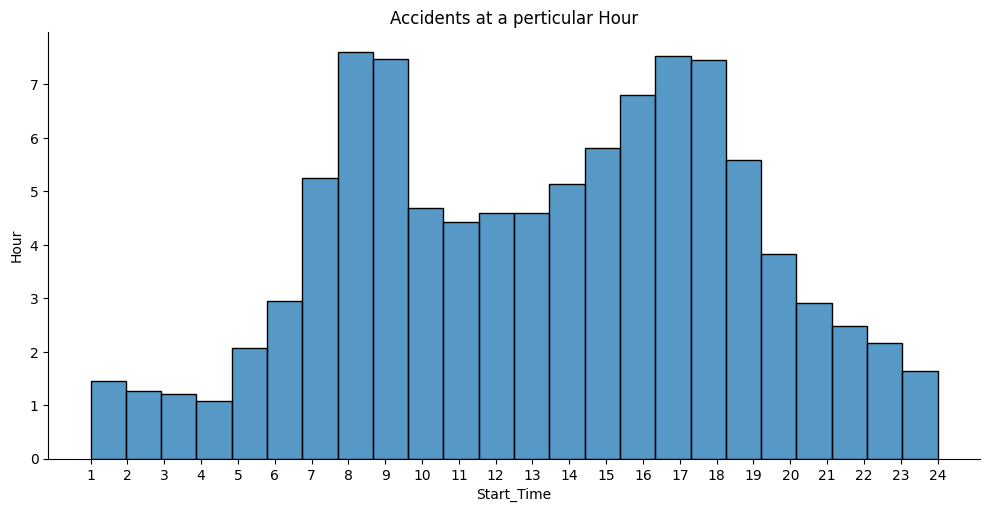

In [33]:
#retriving hour of the ouccered accidents 'df.Start_Time.dt.hour'
# NOTE: aspect attribute widens the plot
sns.displot(df.Start_Time.dt.hour, bins= 24, stat='percent', aspect = 2 )
plt.title('Accidents at a perticular Hour')
plt.ylabel("Percentage")
plt.ylabel("Hour")
plt.xticks(ticks=range(0,24),labels=list(range(1,25)))
plt.show()

- A high percentage of accidents occur between 6 am to 11 am (probability people in hurry to get to work)
- Next highest percentage is between 3 pm to 6 pm.

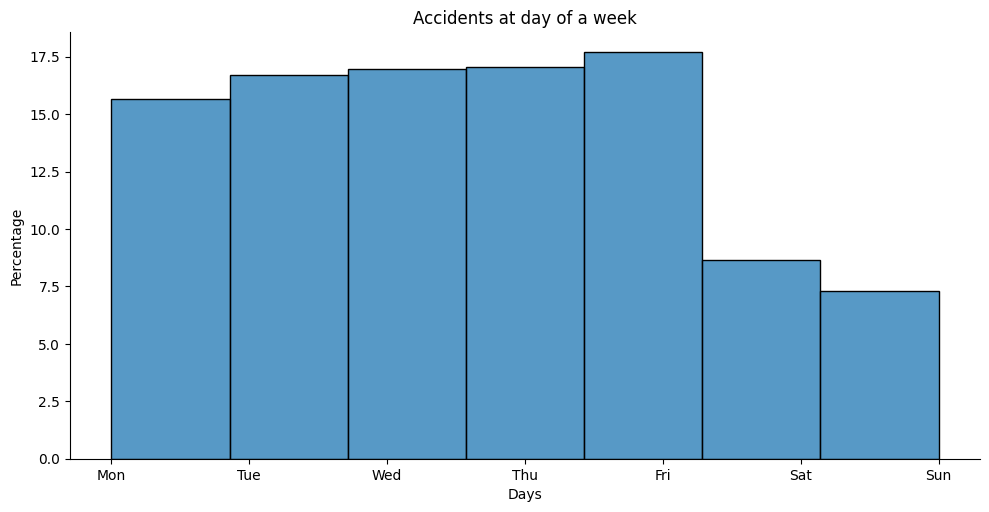

In [34]:
#retriving day of the week 'df.Start_Time.dt.hour'
# NOTE: aspect attribute widens the plot
sns.displot(df.Start_Time.dt.dayofweek, bins= 7, stat='percent', aspect = 2 )
plt.title('Accidents at day of a week')
plt.ylabel("Percentage")
plt.xlabel("Days")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

- Weekednds has fewer accidents.

In [35]:
mon_start_time = df.Start_Time[(df.Start_Time.dt.dayofweek == 0)] #Monday
sat_start_time = df.Start_Time[(df.Start_Time.dt.dayofweek == 5)] #Saturday
sun_start_time = df.Start_Time[(df.Start_Time.dt.dayofweek == 6)] #Sunday

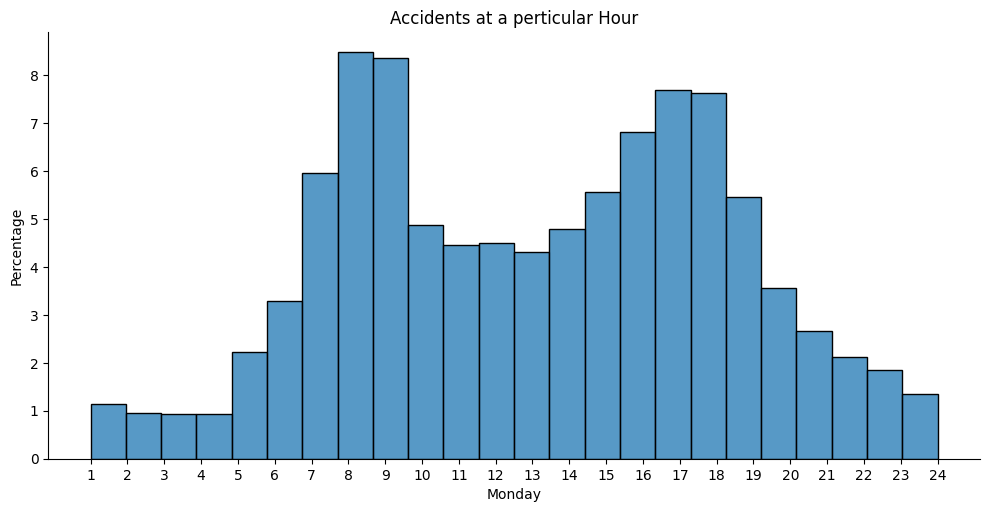

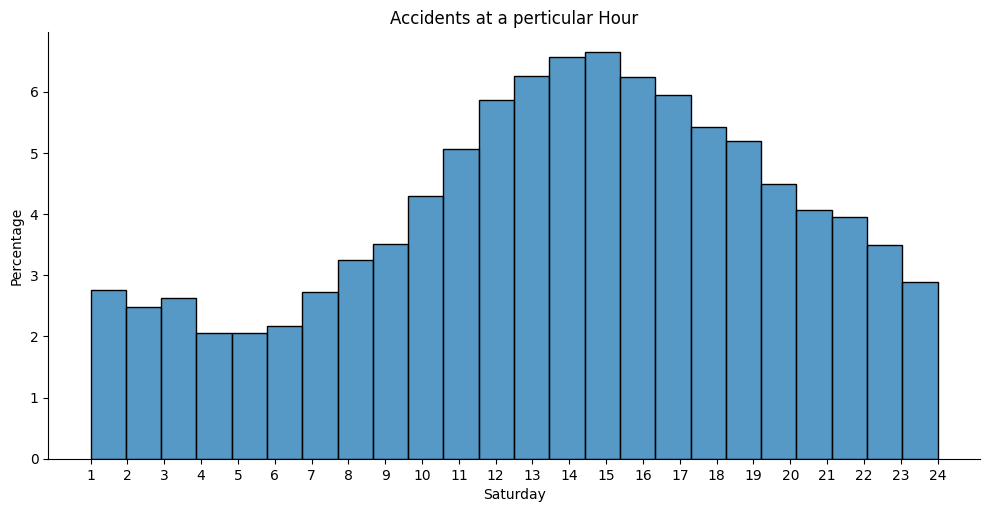

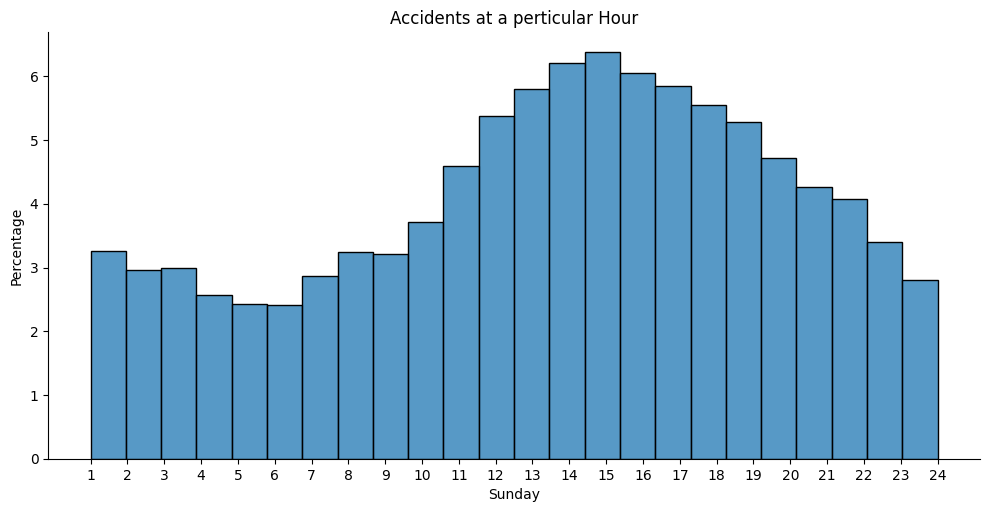

In [36]:
#retriving hour of the ouccered accidents 'df.Start_Time.dt.hour'
# NOTE: aspect attribute widens the plot
sns.displot(mon_start_time.dt.hour, bins= 24, stat='percent', aspect = 2 )
plt.title('Accidents at a perticular Hour')
plt.ylabel("Percentage")
plt.xlabel("Monday")
plt.xticks(ticks=range(0,24),labels=list(range(1,25)))

#retriving hour of the ouccered accidents 'df.Start_Time.dt.hour'
# NOTE: aspect attribute widens the plot
sns.displot(sat_start_time.dt.hour, bins= 24, stat='percent', aspect = 2 )
plt.title('Accidents at a perticular Hour')
plt.ylabel("Percentage")
plt.xlabel("Saturday")
plt.xticks(ticks=range(0,24),labels=list(range(1,25)))

#retriving hour of the ouccered accidents 'df.Start_Time.dt.hour'
# NOTE: aspect attribute widens the plot
sns.displot(sun_start_time.dt.hour, bins= 24, stat='percent', aspect = 2 )
plt.title('Accidents at a perticular Hour')
plt.ylabel("Percentage")
plt.xlabel("Sunday")
plt.xticks(ticks=range(0,24),labels=list(range(1,25)))

plt.show()

**Is the distribution of accidents by hour same on weekends as on weekdays?**

- On Sundays & Saturdays (Weekends) Peak time is between 10 am and 8 pm unlike week days.
add Codeadd Markdown

In [37]:
year = 2019  #Tunable 
df_2023 = df.Start_Time[df.Start_Time.dt.year == year]

[]

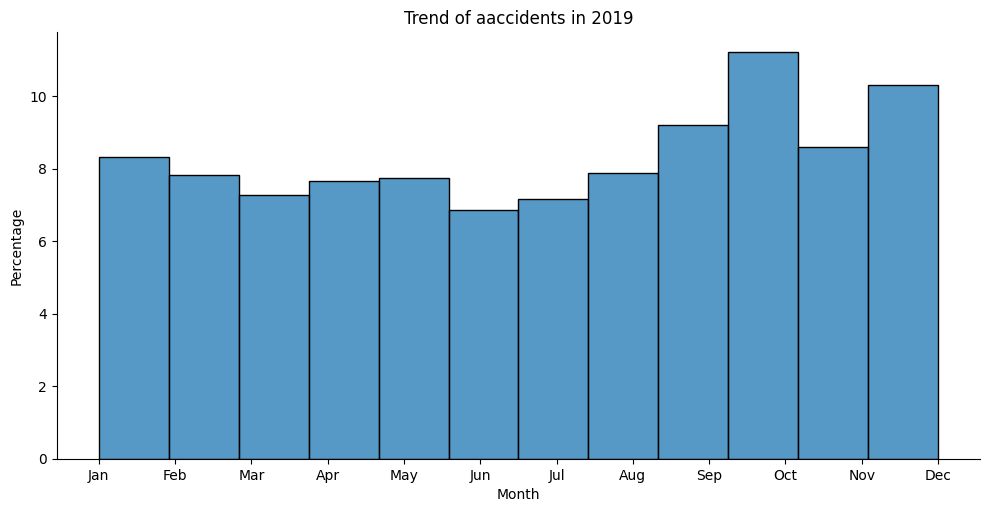

In [38]:
#retriving month of the ouccered accidents 'df.Start_Time.dt.month'
# NOTE: aspect attribute widens the plot

sns.displot(df_2023.dt.month, bins= 12, stat='percent', aspect = 2 )
plt.title(f'Trend of aaccidents in {year}')
plt.ylabel("Percentage")
plt.xlabel("Month")
plt.xticks(ticks=range(1,13),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.plot()

- Much data is missing for 2016, 2017 & 2023

array(['Source2', 'Source3', 'Source1'], dtype=object)

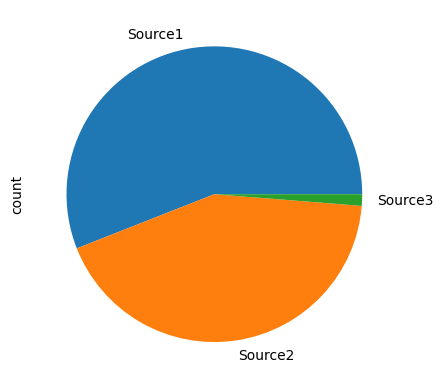

In [39]:
df.Source.value_counts().plot(kind='pie')
df.Source.unique()

- Source 2 has Inconsistant data (Cross Verified)

### 3. Exploring Start Lattitude & Start Longitude
---

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

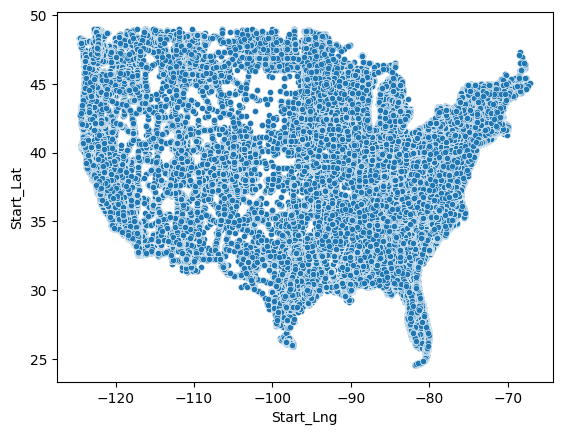

In [40]:
sns.scatterplot(x = df.Start_Lng, y = df.Start_Lat, s = 20)

In [41]:
# sample_df = df.sample(int(0.01 * len(df)))
sample_df = df.sample(n=1000)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

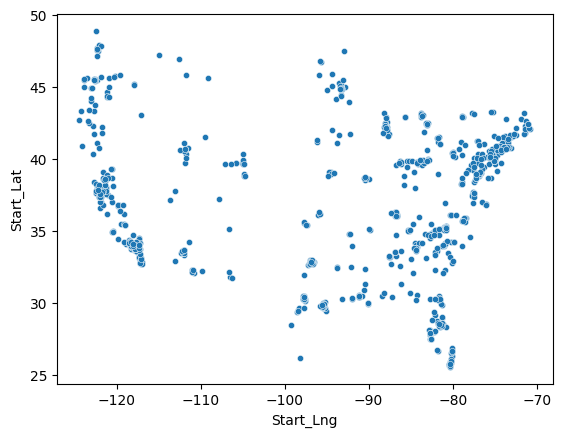

In [42]:
sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat, s = 20)

In [44]:
import folium
m1 = folium.Map(location=[39.5, -98.35], zoom_start=4)
for lat, lon in zip(sample_df.Start_Lat, sample_df.Start_Lng):
    folium.CircleMarker(location=[lat, lon], radius=1, color='blue', fill=True).add_to(m1)
m1

In [45]:
from folium.plugins import HeatMap
m2 = folium.Map(location=[39.5, -98.35], zoom_start=4)
heat_data =(list( zip(sample_df.Start_Lat, sample_df.Start_Lng)))
HeatMap(heat_data).add_to(m2)
m2

## Interrogation

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the most number of acciddents? How about per capita?
3. Does New York show up in the data?  If yes why is the count lower if this is the most popullated city?
4. Among the Top 100 cities which state does they belong to most freequently?
5. What time of the day are accidents most frequently in?
6. Which days of the week have the most accidents?
7. Which months have more accidents?
8. Whats the trend of accidents year over year(increasing/decreasing?)
9. When is accidents per unit of traffic the highest?

## Concluding Summary
---

- Less that 9% of cities have more than 1000 yearly accidents.
- The no. of accidents per city decreases exponentially.
- Over 1000 cities reported just one accident (need to investigate).